# Introduction

Our input is the resulting dataset from the Exploratory Data Analysis and the Feature Engineering performed on any original datasets. <br/>

## Imports

In [1]:
%load_ext pycodestyle_magic
%flake8_on

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

In [3]:
# File system manangement
import os
import gc

In [4]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# prepare data
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
# models and metrics
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict

In [6]:
# LightGBMError: Do not support special JSON characters in feature name
import re

In [7]:
# hyperopt
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, space_eval

In [8]:
# timing
from timeit import default_timer as timer

In [9]:
# persistant search for hyperopt
import threading as th
import keyboard

In [10]:
# pickle
import pickle

In [11]:
# custom functions
from ipynb.fs.full.functions import heatmap, missing_values_table, convert_types
from ipynb.fs.full.functions import show_results

2:80: E501 line too long (80 > 79 characters)


In [12]:
''' warning show results to debug in functions (plot_roc_curve issue)'''

' warning show results to debug in functions (plot_roc_curve issue)'

In [12]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# paramètres
# to display any columns
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
sns.set(style="ticks")
sns.set_style('whitegrid')

## Read in Data

In [14]:
# List files available
print(os.listdir('Data/'))

['aggregated.csv', 'any_app.pkl', 'application.pkl', 'application_miss.pkl', 'application_test.csv', 'application_train.csv', 'application_trunc.csv', 'backup_full_aggregated.csv', 'backup_opti_aggregated.csv', 'boruta_ranking.csv', 'boruta_ranking.pkl', 'boruta_support.pkl', 'bureau.csv', 'bureau.pkl', 'bureau_balance.csv', 'credit_card_balance.csv', 'desc.pkl', 'Descriptions.xlsx', 'final.csv', 'full_aggregated.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'opti_aggregated.csv', 'POS_CASH_balance.csv', 'previous.pkl', 'previous_application.csv', 'sample_submission.csv', 'sel_app.pkl', 'target.pkl', '~$Descriptions.xlsx']


In [23]:
# load target (for correlation & Boruta study)
with open("Data/sel_app.pkl", mode="rb") as df:
    any_application = pickle.load(df)

In [24]:
print(any_application.shape)
any_application.head(1)

(356251, 273)


,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,N_CNT_PREV_REJECTED_SCOFR,N_FLAG_REJECTED,N_PREV_LAST_REJECTION,N_ADJ_REJECT_INDEX,N_PREV_LAST_APPLICATION,N_REJECT_RATE,N_CNT_BUR_LOANS,N_BUR_LAST_APPLICATION,YEARS_BIRTH,N_DAYS_EMPLOYED_RATIO,N_CREDIT_INCOME_RATIO,N_ANNUITY_INCOME_RATIO,N_CREDIT_TERM,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Pensioner,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MAX,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_SUM,BUR_AMT_CREDIT_SUM_MAX,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_SUM,BUR_AMT_CREDIT_SUM_DEBT_MAX,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_DEBT_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR,BUR_CREDIT_ACTIVE_Active_MEAN,BUR_CREDIT_ACTIVE_Closed_MEAN,BUR_CREDIT_TYPE_Cash loans_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_VAR,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_N_APP_CREDIT_RATIO_MIN,PREV_N_APP_CREDIT_RATIO_MAX,PREV_N_APP_CREDIT_RATIO_MEAN,PREV_N_ADJ_CREDIT_RATIO_MIN,PREV_N_ADJ_CREDIT_RATIO_MAX,PREV_N_ADJ_CREDIT_RATIO_MEAN,PREV_N_ADJ_INTEREST_EVAL_MIN,PREV_N_ADJ_INTEREST_EVAL_MAX,PREV_N_ADJ_INTEREST_EVAL_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MIN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_VAR,PREV_NC_LOAN_TERM_SUM,PREV_NC_LOAN_TERM_VAR,PREV_NC_LOAN_AGE_MAX,PREV_NC_LOAN_AGE_MEAN,PREV_NC_LOAN_AGE_SUM,PREV_NC_LOAN_AGE_VAR,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_CODE_REJECT_REASON_REJECTED_HC_MEAN,PREV_CODE_REJECT_REASON_REJECTED_SCOFR_MEAN,PREV_CODE_REJECT_REASON_REJECTED_XAP_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_N_CONTRACT_STATUS_APPROVED_MEAN,PREV_N_CONTRACT_STATUS_REJECTED_HC_MEAN,PREV_N_CONTRACT_STATUS_REJ

# Data preparation

### Get back train - test from "Any applications"

In [25]:
# keep training applications only
train = any_application[any_application['TARGET'].notna()]
test = any_application[any_application['TARGET'].isna()]

In [26]:
print('Training set full shape: ', train.shape)
print('Testing set full shape: ', test.shape)

Training set full shape:  (307507, 273)
Testing set full shape:  (48744, 273)


In [19]:
train.head(1)

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,N_CNT_PREV_REJECTED_SCOFR,N_FLAG_REJECTED,N_PREV_LAST_REJECTION,N_ADJ_REJECT_INDEX,N_PREV_LAST_APPLICATION,N_REJECT_RATE,N_CNT_BUR_LOANS,N_BUR_LAST_APPLICATION,YEARS_BIRTH,N_DAYS_EMPLOYED_RATIO,N_CREDIT_INCOME_RATIO,N_ANNUITY_INCOME_RATIO,N_CREDIT_TERM,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Pensioner,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MAX,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_SUM,BUR_AMT_CREDIT_SUM_MAX,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_SUM,BUR_AMT_CREDIT_SUM_DEBT_MAX,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_DEBT_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR,BUR_CREDIT_ACTIVE_Active_MEAN,BUR_CREDIT_ACTIVE_Closed_MEAN,BUR_CREDIT_TYPE_Cash loans_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_VAR,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_N_APP_CREDIT_RATIO_MIN,PREV_N_APP_CREDIT_RATIO_MAX,PREV_N_APP_CREDIT_RATIO_MEAN,PREV_N_ADJ_CREDIT_RATIO_MIN,PREV_N_ADJ_CREDIT_RATIO_MAX,PREV_N_ADJ_CREDIT_RATIO_MEAN,PREV_N_ADJ_INTEREST_EVAL_MIN,PREV_N_ADJ_INTEREST_EVAL_MAX,PREV_N_ADJ_INTEREST_EVAL_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MIN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_VAR,PREV_NC_LOAN_TERM_SUM,PREV_NC_LOAN_TERM_VAR,PREV_NC_LOAN_AGE_MAX,PREV_NC_LOAN_AGE_MEAN,PREV_NC_LOAN_AGE_SUM,PREV_NC_LOAN_AGE_VAR,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_CODE_REJECT_REASON_REJECTED_HC_MEAN,PREV_CODE_REJECT_REASON_REJECTED_SCOFR_MEAN,PREV_CODE_REJECT_REASON_REJECTED_XAP_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_N_CONTRACT_STATUS_APPROVED_MEAN,PREV_N_CONTRACT_STATUS_REJECTED_HC_MEAN,PREV_N_CONTRACT_STATUS_REJ

In [27]:
# set index with SK_ID_CURR
train = train.set_index('SK_ID_CURR')
test = test.set_index('SK_ID_CURR')

### Data integrity

Missing values affect classifier performance and ability to remedy class imbalance (i.e. ability to build consistent synthetic data in case of SMOTE use to upsample minority class), we have to track the features with many missing value, decide if we should keep them and find the best imputation strategy.

In [21]:
# check for missing values
missing_values = missing_values_table(train)

Your selected dataframe has 272 columns.
There are 246 columns that have missing values.


<AxesSubplot:>

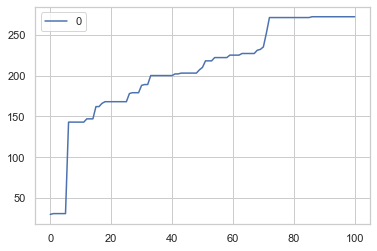

4:80: E501 line too long (103 > 79 characters)


In [22]:
# get the missing curve
missing_list = []
for i in np.arange(0, 101, 1):
    missing = train.shape[1] - len(list(missing_values.index[missing_values['% of Total Values'] > i]))
    missing_list.append(missing)
pd.DataFrame(missing_list).plot()

In [23]:
len(list(missing_values.index[missing_values['% of Total Values'] > 90]))

0

## Train, Test split

SK_ID_CURR is now the index and we build a separated target y_ df from the training data X_. <br/>
Note that we have to build it in a DataFrame format (in order to extract a sample after the train-test split.

In [30]:
def preprocess_split(
    data=train,
    split_size=0.2,
    impute_strategy='constant',
    scale_strategy=False
):
    '''function that split data into train and test according to split_size (test)
    and impute missing values according to the impute strategy
    and option to MinMaxScale features'''
    # drop the target from the training data
    if 'TARGET' in data:
        X_ = data.drop(columns=['TARGET'])
    else:
        X_ = data.copy()
    y_ = data['TARGET']
    # to keep df format : store columns & index
    columns = X_.columns
    index = X_.index
    # imputation of missing values
    imputer = SimpleImputer(
        missing_values=np.nan,
        strategy=impute_strategy)
    imputer.fit(X_)
    X_ = pd.DataFrame(
        imputer.fit_transform(X_),
        columns=columns,
        index=index)
    # Scale if True, each feature to 0-1
    if scale_strategy is True:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(X_)
        X_ = pd.DataFrame(
            scaler.fit_transform(X_),
            columns=columns,
            index=index)
    # Split data into train and test set (stratify by target)
    X_train, X_test, y_train, y_test = train_test_split(
        X_,
        y_,
        stratify=y_,
        test_size=split_size,
        random_state=7)
    print('Training data shape: ', X_train.shape)
    print('Testing data shape: ', X_test.shape)
    print('Labels train data shape: ', y_train.shape)
    print('Labels test data shape: ', y_test.shape)
    return X_train, X_test, y_train, y_test, columns

In [31]:
X_train, X_test, y_train, y_test, features = preprocess_split()

Training data shape:  (246005, 271)
Testing data shape:  (61502, 271)
Labels train data shape:  (246005,)
Labels test data shape:  (61502,)


In [243]:
X_train_sc, X_test_sc, y_train, y_test, features = preprocess_split(scale_strategy=True)

Training data shape:  (246005, 271)
Testing data shape:  (61502, 271)
Labels train data shape:  (246005,)
Labels test data shape:  (61502,)


1:80: E501 line too long (80 > 79 characters)


In [244]:
X_train_me, X_test_me, y_train, y_test, features = preprocess_split(impute_strategy='mean')

Training data shape:  (246005, 271)
Testing data shape:  (61502, 271)
Labels train data shape:  (246005,)
Labels test data shape:  (61502,)


1:80: E501 line too long (83 > 79 characters)


In [265]:
X_train_ms, X_test_ms, y_train, y_test, features = preprocess_split(impute_strategy='mean', scale_strategy=True)

Training data shape:  (246005, 271)
Testing data shape:  (61502, 271)
Labels train data shape:  (246005,)
Labels test data shape:  (61502,)


1:80: E501 line too long (104 > 79 characters)


### Sampling - model selection process

! we need to work with proper df types

In [211]:
# randomly sample the train data and apply to target
X_train_sample = X_train.sample(n=8000, random_state=42)
# Get the indexes to sample target_vector
sample_index = X_train_sample.index
mask = (y_train.index.isin(sample_index))
y_train_sample = y_train[mask]
# print results
len(y_train_sample)

8000

In [208]:
X_train_re_sample = X_train_sample.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

1:80: E501 line too long (92 > 79 characters)


In [209]:
# control failure rate of sample
print('global failure rate: ',
     round(100 * y_train_sample.value_counts()[1] / (y_train_sample.value_counts()[1] + y_train_sample.value_counts()[0]), 2))

global failure rate:  8.07


3:6: E128 continuation line under-indented for visual indent
3:80: E501 line too long (126 > 79 characters)


In [212]:
# randomly sample the test data and apply to target
X_test_sample = X_test.sample(n=2000, random_state=42)
# Get the indexes to sample target_vector
sample_index = X_test_sample.index
mask = (y_test.index.isin(sample_index))
y_test_sample = y_test[mask]
# print results
len(y_test_sample)

2000

In [214]:
# control failure rate of sample
print('global failure rate: ',
     round(100 * y_test_sample.value_counts()[1] / (y_test_sample.value_counts()[1] + y_test_sample.value_counts()[0]), 2))

global failure rate:  8.95


3:6: E128 continuation line under-indented for visual indent
3:80: E501 line too long (123 > 79 characters)


In [213]:
X_test_re_sample = X_test_sample.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

1:80: E501 line too long (90 > 79 characters)


In [215]:
X_opt = X_train_re_sample
y_opt = y_train_sample

# Model evaluation

## Metric: Area Under Roc & "Damage Scoring"

First off all, accuracy (Σ True positive or negative / Σ Total) is __not a relevant metric__ in our case, mainly due to the __class imbalance__, with over than 90% accuracy if we predict the majority class only, granting loan to anyone and facing any risky clients failures.
The area under the ROC curve offers a more valuable metric, that can be trusted for models comparison. A model that simply guesses at random will have an ROC AUC of 0.5. Any improvement of AUC score, up to ideal 1, means the model gets to a minimal False positive rate and a maximal True positive rate.
In our case, we'll even discuss the opportunity of building our own score, based on an detailed interpretation of the confusion matrix (see [F-score](https://en.wikipedia.org/wiki/F-score)) to more accurately define what could be the "best" retuls, in terms of the financial opportunity or damages for the company. This lead to build a compromise between approval of risky clients and rejection og good ones. <br/>
After studying the resulting populated confusion matrix, we decided to use Fbeta to value the relative importance of recall over precision (with an illustrative value of beta=7), which is a good approach to value the financial damage of granting a loan to a failure-risky client than rejecting a loan to a "good" client.

## Classifiers evaluation techniques

1. first run and compare 

2. K-Fold cross validation technique

3. Hyperopt? We choose to work with the 5.2k stars lib [hyperopt](https://github.com/hyperopt/hyperopt) to find the most relevant model.

## Classifiers rough training

Let's create a model_run function that will instanciate any classifier and get results.

In [37]:
def model_run(
    model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    f7 = fbeta_score(y_test, y_pred, beta=7)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    auc_score_roc = roc_auc_score(y_test, y_pred)

    print(model)
    print('AUC score: ', round(auc_score, 4))
    print('AUC score -roc: ', round(auc_score_roc, 4))
    print('Fbeta score (7): ', round(f7, 4))

    return fpr, tpr, auc_score, f7

### Naive Baseline

For a naive baseline, we could guess the same value for all examples on the testing set.  We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This  will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5.

In [248]:
naive = GaussianNB()
fpr_naive, tpr_naive, auc_score_naive, f7_naive = model_run(naive)

GaussianNB()
AUC score:  0.5726
AUC score -roc:  0.5137
Fbeta score (7):  0.7622


In [249]:
fpr_naive_me, tpr_naive_me, auc_score_naive_me, f7_naive_me = model_run(
    naive,
    X_train=X_train_me,
    y_train=y_train,
    X_test=X_test_me,
    y_test=y_test)

GaussianNB()
AUC score:  0.5635
AUC score -roc:  0.5114
Fbeta score (7):  0.7667


In [250]:
fpr_naive_sc, tpr_naive_sc, auc_score_naive_sc, f7_naive_sc = model_run(
    naive,
    X_train=X_train_sc,
    y_train=y_train,
    X_test=X_test_sc,
    y_test=y_test)

GaussianNB()
AUC score:  0.6614
AUC score -roc:  0.6146
Fbeta score (7):  0.6497


In [266]:
fpr_naive_ms, tpr_naive_ms, auc_score_naive_ms, f7_naive_ms = model_run(
    naive,
    X_train=X_train_ms,
    y_train=y_train,
    X_test=X_test_ms,
    y_test=y_test)

GaussianNB()
AUC score:  0.6634
AUC score -roc:  0.6098
Fbeta score (7):  0.6764


### Logistic Regression

In [228]:
logreg = LogisticRegression()
fpr_logreg, tpr_logreg, auc_score_logreg, f7_logreg = model_run(logreg)

LogisticRegression()
AUC score:  0.5755
AUC score -roc:  0.5002
Fbeta score (7):  0.0007


In [253]:
fpr_logreg_me, tpr_logreg_me, auc_score_logreg_me, f7_logreg_me = model_run(
    logreg,
    X_train=X_train_me,
    y_train=y_train,
    X_test=X_test_me,
    y_test=y_test)

LogisticRegression()
AUC score:  0.567
AUC score -roc:  0.5
Fbeta score (7):  0.0002


In [254]:
fpr_logreg_sc, tpr_logreg_sc, auc_score_logreg_sc, f7_logreg_sc = model_run(
    logreg,
    X_train=X_train_sc,
    y_train=y_train,
    X_test=X_test_sc,
    y_test=y_test)

LogisticRegression()
AUC score:  0.7313
AUC score -roc:  0.502
Fbeta score (7):  0.0045


In [267]:
fpr_logreg_ms, tpr_logreg_ms, auc_score_logreg_ms, f7_logreg_ms = model_run(
    logreg,
    X_train=X_train_ms,
    y_train=y_train,
    X_test=X_test_ms,
    y_test=y_test)

LogisticRegression()
AUC score:  0.7327
AUC score -roc:  0.5023
Fbeta score (7):  0.0053


### Random Forest

In [221]:
rndfor = RandomForestClassifier()
fpr_rndfor, tpr_rndfor, auc_score_rndfor, f7_rndfor = model_run(rndfor)

RandomForestClassifier()
AUC score:  0.4857
AUC score -roc:  0.5
Fbeta score (7):  0.0


In [256]:
fpr_rndfor_me, tpr_rndfor_me, auc_score_rndfor_me, f7_rndfor_me = model_run(
    rndfor,
    X_train=X_train_me,
    y_train=y_train,
    X_test=X_test_me,
    y_test=y_test)

RandomForestClassifier()
AUC score:  0.6905
AUC score -roc:  0.502
Fbeta score (7):  0.0041


In [257]:
fpr_rndfor_sc, tpr_rndfor_sc, auc_score_rndfor_sc, f7_rndfor_sc = model_run(
    rndfor,
    X_train=X_train_sc,
    y_train=y_train,
    X_test=X_test_sc,
    y_test=y_test)

RandomForestClassifier()
AUC score:  0.6908
AUC score -roc:  0.5018
Fbeta score (7):  0.0039


In [268]:
fpr_rndfor_ms, tpr_rndfor_ms, auc_score_rndfor_ms, f7_rndfor_ms = model_run(
    rndfor,
    X_train=X_train_ms,
    y_train=y_train,
    X_test=X_test_ms,
    y_test=y_test)

RandomForestClassifier()
AUC score:  0.6897
AUC score -roc:  0.5016
Fbeta score (7):  0.0035


### LightGBM

In [34]:
# features format
X_train_re = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_test_re = X_test.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

In [260]:
liggbm = LGBMClassifier()
fpr_liggbm, tpr_liggbm, auc_score_liggbm, f7_liggbm = model_run(
    liggbm,
    X_train_re,
    y_train,
    X_test_re,
    y_test)

LGBMClassifier()
AUC score:  0.7612
AUC score -roc:  0.5098
Fbeta score (7):  0.0216


In [261]:
# features format
X_train_re_me = X_train_me.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_test_re_me = X_test_me.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

2:80: E501 line too long (84 > 79 characters)
3:80: E501 line too long (82 > 79 characters)


In [262]:
liggbm = LGBMClassifier()
fpr_liggbm_me, tpr_liggbm_me, auc_score_liggbm_me, f7_liggbm_me = model_run(
    liggbm,
    X_train_re_me,
    y_train,
    X_test_re_me,
    y_test)

LGBMClassifier()
AUC score:  0.7589
AUC score -roc:  0.51
Fbeta score (7):  0.0222


In [263]:
# features format
X_train_re_sc = X_train_sc.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_test_re_sc = X_test_sc.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

2:80: E501 line too long (84 > 79 characters)
3:80: E501 line too long (82 > 79 characters)


In [264]:
liggbm = LGBMClassifier()
fpr_liggbm_sc, tpr_liggbm_sc, auc_score_liggbm_sc, f7_liggbm_sc = model_run(
    liggbm,
    X_train_re_sc,
    y_train,
    X_test_re_sc,
    y_test)

LGBMClassifier()
AUC score:  0.7596
AUC score -roc:  0.5095
Fbeta score (7):  0.0207


In [269]:
# features format
X_train_re_ms = X_train_ms.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_test_re_ms = X_test_ms.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

2:80: E501 line too long (84 > 79 characters)
3:80: E501 line too long (82 > 79 characters)


In [270]:
liggbm = LGBMClassifier()
fpr_liggbm_ms, tpr_liggbm_ms, auc_score_liggbm_ms, f7_liggbm_ms = model_run(
    liggbm,
    X_train_re_ms,
    y_train,
    X_test_re_ms,
    y_test)

LGBMClassifier()
AUC score:  0.7596
AUC score -roc:  0.5092
Fbeta score (7):  0.0203


### Collect results : comparison preprocessing - classifiers

In [285]:
# Collect results
preprocess_cases = [
    'Zero\n NotScaled',
    'Mean\n NotScaled',
    'Zero\n Scaled',
    'Mean\n Scaled']
NB_auc_scores = [
    auc_score_naive,
    auc_score_naive_me,
    auc_score_naive_sc,
    auc_score_naive_ms]
LR_auc_scores = [
    auc_score_logreg,
    auc_score_logreg_me,
    auc_score_logreg_sc,
    auc_score_logreg_ms]
RF_auc_scores = [
    auc_score_rndfor,
    auc_score_rndfor_me,
    auc_score_rndfor_sc,
    auc_score_rndfor_ms]
LG_auc_scores = [
    auc_score_liggbm,
    auc_score_liggbm_me,
    auc_score_liggbm_sc,
    auc_score_liggbm_ms]

Text(0.5, 1.0, 'Light GBM')

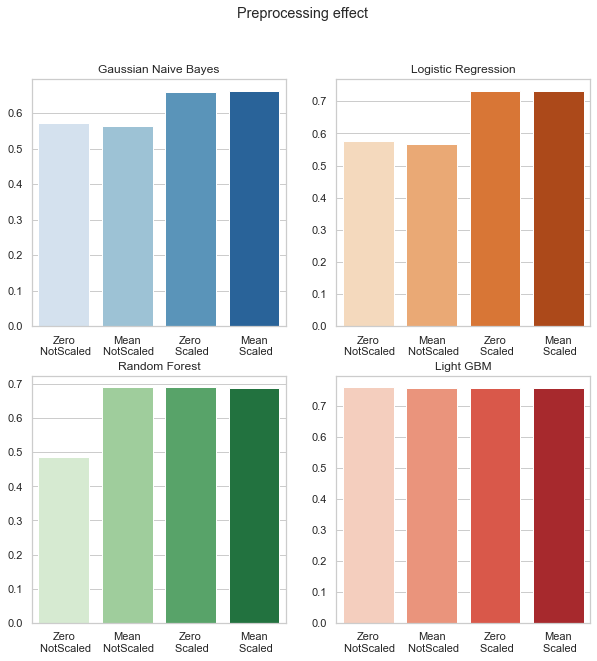

4:80: E501 line too long (80 > 79 characters)
6:80: E501 line too long (82 > 79 characters)
8:80: E501 line too long (81 > 79 characters)


In [298]:
# display results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Preprocessing effect')
sns.barplot(ax=axes[0, 0], x=preprocess_cases, y=NB_auc_scores, palette="Blues")
axes[0, 0].set_title('Gaussian Naive Bayes')
sns.barplot(ax=axes[0, 1], x=preprocess_cases, y=LR_auc_scores, palette="Oranges")
axes[0, 1].set_title('Logistic Regression')
sns.barplot(ax=axes[1, 0], x=preprocess_cases, y=RF_auc_scores, palette="Greens")
axes[1, 0].set_title('Random Forest')
sns.barplot(ax=axes[1, 1], x=preprocess_cases, y=LG_auc_scores, palette="Reds")
axes[1, 1].set_title('Light GBM')

### Roc curves (case of preprocessing mean-scaled)

In [299]:
# for Roc curve plots
classifier_names = [
    'Best Gaussian Naive Bayes',
    'Best Logistic Regression',
    'Best Random Forest',
    'Best LightGBM']

Text(0, 0.5, 'True Positive Rate')

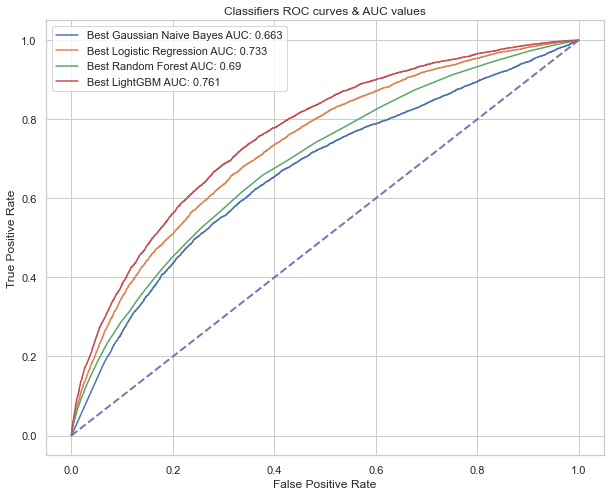

In [301]:
# display roc curves
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(
    fpr_naive_ms,
    tpr_naive_ms,
    label=str(classifier_names[0])
    + ' AUC: '
    + str(round(auc_score_naive_ms, 3)))
ax.plot(
    fpr_logreg_ms,
    tpr_logreg_ms,
    label=str(classifier_names[1])
    + ' AUC: '
    + str(round(auc_score_logreg_ms, 3)))
ax.plot(
    fpr_rndfor_me,
    tpr_rndfor_me,
    label=str(classifier_names[2])
    + ' AUC: '
    + str(round(auc_score_rndfor_me, 3)))
ax.plot(
    fpr_liggbm,
    tpr_liggbm,
    label=str(classifier_names[3])
    + ' AUC: '
    + str(round(auc_score_liggbm, 3)))
ax.plot([0, 1], [0, 1], linewidth=2, linestyle='--')
plt.legend(loc="best")
plt.title("Classifiers ROC curves & AUC values")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Oversampling with SMOTE to remedy  class imbalance

This is a Synthetic Minority Oversampling Technique which consists in creating data to enrich the minority class. <br/>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

<AxesSubplot:>

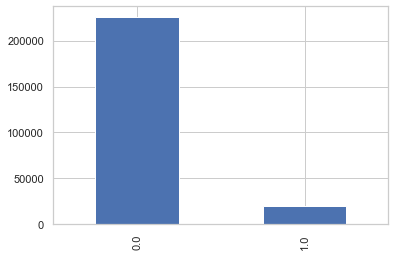

In [239]:
# observe class imbalance
pd.Series(y_train).value_counts().plot.bar()

In [233]:
# initialiaze SMOTE
sm = SMOTE(random_state=7)

In [234]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel())

<AxesSubplot:>

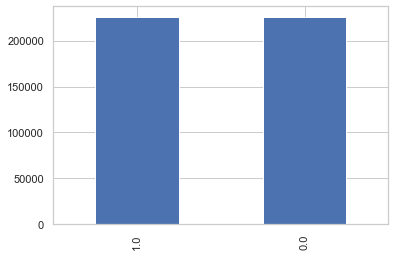

In [235]:
# observe that data has been balanced
pd.Series(y_train_sm).value_counts().plot.bar()

### Comparison SMOTE versus class_weight='balanced'

In [303]:
fpr_logreg_sm, tpr_logreg_sm, auc_score_logreg_sm, f7_logreg_sm = model_run(
    logreg,
    X_train=X_train_sm,
    y_train=y_train_sm,
    X_test=X_test,
    y_test=y_test)

LogisticRegression()
AUC score:  0.6231
AUC score -roc:  0.569
Fbeta score (7):  0.3128


In [306]:
log_reg_w = LogisticRegression(class_weight='balanced')

In [307]:
fpr_logreg_w, tpr_logreg_w, auc_score_logreg_w, f7_logreg_w = model_run(
    log_reg_w,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test)

LogisticRegression(class_weight='balanced')
AUC score:  0.6212
AUC score -roc:  0.5699
Fbeta score (7):  0.3311


In [312]:
fpr_logreg_w, tpr_logreg_w, auc_score_logreg_w, f7_logreg_w = model_run(
    log_reg_w,
    X_train=X_train_sm,
    y_train=y_train_sm,
    X_test=X_test,
    y_test=y_test)

LogisticRegression(class_weight='balanced')
AUC score:  0.6231
AUC score -roc:  0.569
Fbeta score (7):  0.3128


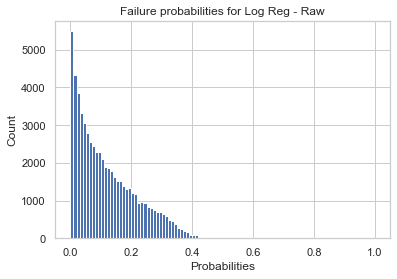

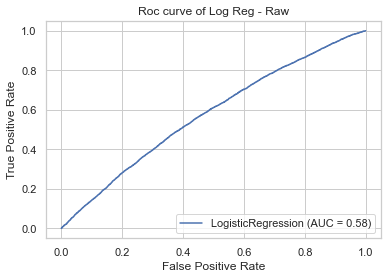

1:80: E501 line too long (106 > 79 characters)


In [309]:
show_results(logreg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, case='Log Reg - Raw')

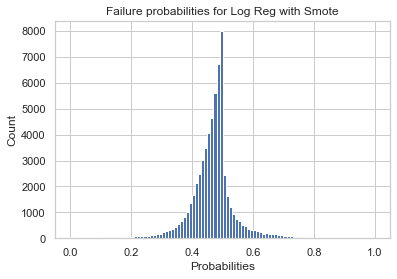

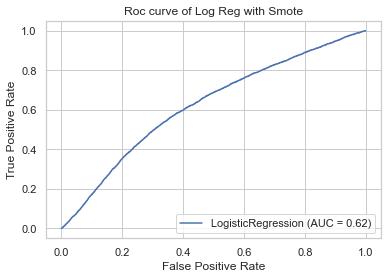

1:80: E501 line too long (117 > 79 characters)


In [310]:
show_results(logreg, X_train=X_train_sm, X_test=X_test, y_train=y_train_sm, y_test=y_test, case='Log Reg with Smote')

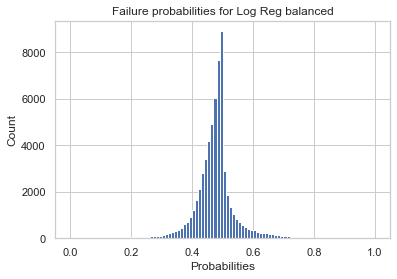

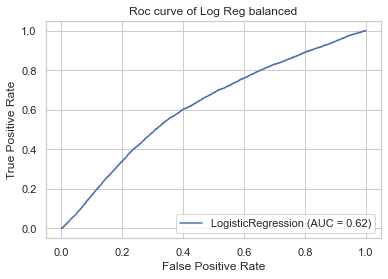

1:80: E501 line too long (112 > 79 characters)


In [391]:
show_results(log_reg_w, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, case='Log Reg balanced')

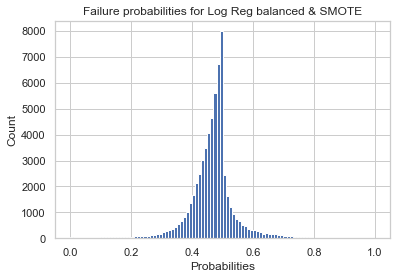

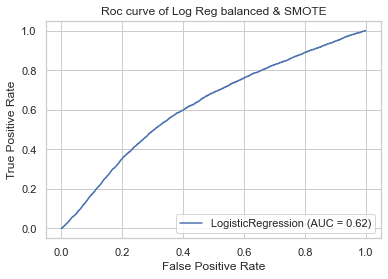

1:80: E501 line too long (126 > 79 characters)


In [392]:
show_results(log_reg_w, X_train=X_train_sm, X_test=X_test, y_train=y_train_sm, y_test=y_test, case='Log Reg balanced & SMOTE')

In [313]:
fpr_rndfor_sm, tpr_rndfor_sm, auc_score_rndfor_sm, f7_rndfor_sm = model_run(
    rndfor,
    X_train=X_train_sm,
    y_train=y_train_sm,
    X_test=X_test,
    y_test=y_test)

RandomForestClassifier()
AUC score:  0.7035
AUC score -roc:  0.5082
Fbeta score (7):  0.0195


In [314]:
rndfor_w = RandomForestClassifier(class_weight='balanced')

In [315]:
fpr_rndfor_w, tpr_rndfor_w, auc_score_rndfor_w, f7_rndfor_w = model_run(
    rndfor_w,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test)

RandomForestClassifier(class_weight='balanced')
AUC score:  0.7074
AUC score -roc:  0.5012
Fbeta score (7):  0.0027


In [316]:
fpr_rndfor_w_sm, tpr_rndfor_w_sm, auc_score_rndfor_w_sm, f7_rndfor_w_sm = model_run(
    rndfor_w,
    X_train=X_train_sm,
    y_train=y_train_sm,
    X_test=X_test,
    y_test=y_test)

RandomForestClassifier(class_weight='balanced')
AUC score:  0.7065
AUC score -roc:  0.5089
Fbeta score (7):  0.0209


1:80: E501 line too long (84 > 79 characters)


In [317]:
# features format
X_train_re_sm = X_train_sm.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

2:80: E501 line too long (84 > 79 characters)


In [318]:
fpr_liggbm_sm, tpr_liggbm_sm, auc_score_liggbm_sm, f7_liggbm_sm = model_run(
    liggbm,
    X_train_re_sm,
    y_train_sm,
    X_test_re,
    y_test)

LGBMClassifier()
AUC score:  0.7439
AUC score -roc:  0.5104
Fbeta score (7):  0.0234


In [319]:
liggbm_w = LGBMClassifier(class_weight='balanced')
fpr_liggbm_w, tpr_liggbm_w, auc_score_liggbm_w, f7_liggbm_w = model_run(
    liggbm_w,
    X_train_re,
    y_train,
    X_test_re,
    y_test)

LGBMClassifier(class_weight='balanced')
AUC score:  0.7616
AUC score -roc:  0.6935
Fbeta score (7):  0.6342


In [320]:
fpr_liggbm_w_sm, tpr_liggbm_w_sm, auc_score_liggbm_w_sm, f7_liggbm_w_sm = model_run(
    liggbm_w,
    X_train_re_sm,
    y_train_sm,
    X_test_re,
    y_test)

LGBMClassifier(class_weight='balanced')
AUC score:  0.7439
AUC score -roc:  0.5104
Fbeta score (7):  0.0234


1:80: E501 line too long (84 > 79 characters)


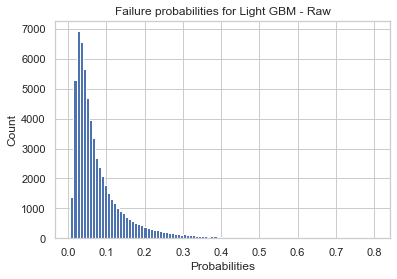

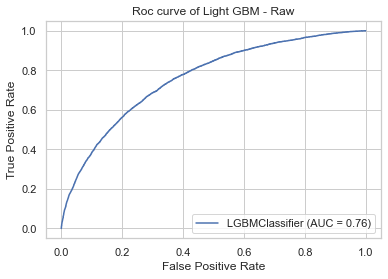

1:80: E501 line too long (114 > 79 characters)


In [322]:
show_results(liggbm, X_train=X_train_re, X_test=X_test_re, y_train=y_train, y_test=y_test, case='Light GBM - Raw')

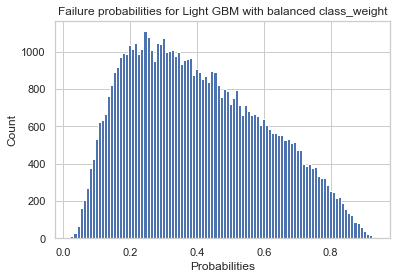

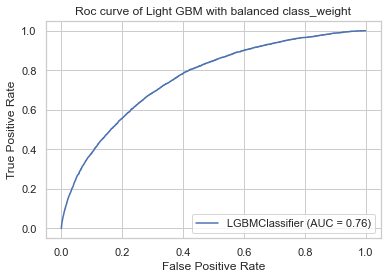

1:80: E501 line too long (137 > 79 characters)


In [323]:
show_results(liggbm_w, X_train=X_train_re, X_test=X_test_re, y_train=y_train, y_test=y_test, case='Light GBM with balanced class_weight')

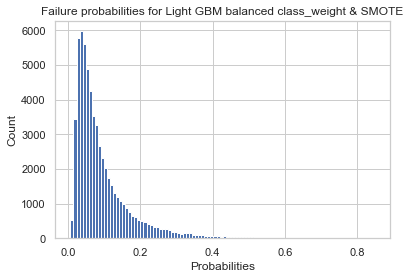

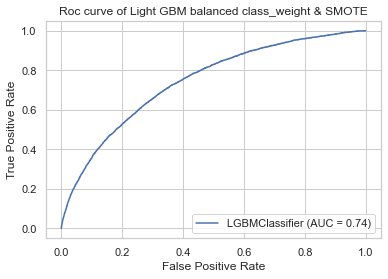

1:80: E501 line too long (146 > 79 characters)


In [325]:
show_results(liggbm_w, X_train=X_train_re_sm, X_test=X_test_re, y_train=y_train_sm, y_test=y_test, case='Light GBM balanced class_weight & SMOTE')

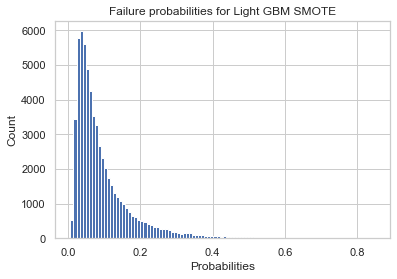

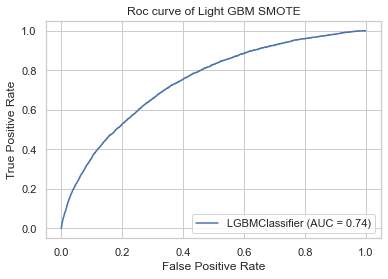

1:80: E501 line too long (120 > 79 characters)



INTERRUPTING… Please wait until shut down.


In [393]:
show_results(liggbm, X_train=X_train_re_sm, X_test=X_test_re, y_train=y_train_sm, y_test=y_test, case='Light GBM SMOTE')

## Optimization

Each classifier comes with its own set of hyperparameters, and those first rough results are worthless because default parameters may be wrong in our case.

### initialiaze search space

In [326]:
# Initializing the search space
space = {}

### preprocessing

here we could evaluate how preprocessing steps affect the results.

### models parameters

In [352]:
models_spaces = {}

In [353]:
naive.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [354]:
models_spaces['naive'] = {
    'model': GaussianNB
}

In [355]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [356]:
models_spaces['logreg'] = {
    'model': LogisticRegression,
    'C': hp.uniform('logreg_C', 0.0001, 2),
    'class_weight': hp.choice('logreg_class_weight', ['balanced', None]),
    'tol': hp.uniform('logreg_tol', 0.00001, 0.0001),
    'solver': hp.choice('logreg_solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'max_iter': hp.choice('logreg_max_iter', range(100, 1000)),
    # 'n_jobs': '-1'
} 

9:2: W291 trailing whitespace


In [357]:
rndfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [358]:
models_spaces['rndfor'] = {
    'model': RandomForestClassifier,
    'class_weight': hp.choice('rndfor_class_weight', ['balanced', None]),
    'max_depth': hp.choice('rndfor_max_depth', np.arange(1, 30, dtype=int)),
    'max_features': hp.choice('rndfor_max_features', range(1, 3)),
    'n_estimators': hp.choice('rndfor_n_estimators', np.arange(10, 800, 50, dtype=int)),
    'criterion': hp.choice('rndfor_criterion', ["gini", "entropy"])
}

6:80: E501 line too long (88 > 79 characters)


In [359]:
liggbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [360]:
models_spaces['liggbm'] = {
    'model': LGBMClassifier,
    'n_estimators': hp.choice('liggbm_n_estimators', np.arange(10, 810, 50, dtype=int)),
    'class_weight': hp.choice('liggbm_class_weight', ['balanced', None]),
    'max_depth': hp.choice('liggbm_max_depth', np.arange(1, 30, dtype=int)),
    'num_leaves': hp.choice('liggbm_num_leaves', np.arange(4, 101, 4, dtype=int)),
    'boosting_type': hp.choice('liggbm_boosting_type', ['gbdt', 'dart', 'goss']),
    'learning_rate': hp.loguniform('liggbm_learning_rate', np.log(0.01), np.log(0.2))
}

3:80: E501 line too long (88 > 79 characters)
6:80: E501 line too long (82 > 79 characters)
7:80: E501 line too long (81 > 79 characters)
8:80: E501 line too long (85 > 79 characters)


### Search space

In [361]:
# choice of a model into collection of models_spaces
space['models_spaces'] = hp.choice(
        'models_spaces',
        [models_spaces[key] for key in models_spaces]
    )

### Tree Parzen Estimator algorithm

In [362]:
# Create the Tree Parzen Estimator algorithm
tpe_algorithm = tpe.suggest

### Initiate KFold

In [363]:
# initiate Kfold
kf = KFold(
    n_splits=3,
    shuffle=True,
    random_state=42,
)

skf = StratifiedKFold(n_splits=5)

### Objective function
As a first step, we try to define FBeta (7) as the general objective, this lead to erroneous Naive model selection, and the general preformance of the model can be under our expectations : we need to demonstrate that an higher AUC Score performance enable even a better FBeta score, setting the right threshold value.

In [183]:
# Define th objective function
def obj_fnc(params,
            X_opt=X_opt,
            y_opt=y_opt):
    # display the set of parameters currently evaluated
    print('current params:', params)
    # get all parameters, except the model
    parameters = params['models_spaces'].copy()
    del parameters['model']
    # create the classifier & its parameters
    clf = params['models_spaces']['model'](**parameters)
    # Perform n_folds cross validation
    start = timer()
    print('Cross-val predict in progress…')
    y_pred = cross_val_predict(
        clf,
        X_opt,
        y_opt,
        method='predict',
        cv=skf)
    # Compute score
    score = fbeta_score(y_opt, y_pred, beta=7)
    # return loss and status
    loss = 1 - score

    run_time = timer() - start
    # displays results
    print("Loss of the model:", loss)
    # evaluation dict
    dict_eval = {
        'loss': loss,
        'score': score,
        'run_time': run_time,
        'status': STATUS_OK,
    }
    return dict_eval

In [184]:
def run_trials():
    trials_step = 1  # nb add trials after loading (1: save after iteration)
    initial_evals = 1  # initial max_trials.
    try:  # try to load an already saved trials object, and increase the max
        hypopt_trials = pickle.load(open("hp_trials/trials.hyperopt", "rb"))
        print("Found saved Trials! Loading...")
        max_evals = len(hypopt_trials.trials) + trials_step
        print("Rerunning from {} trials.".format(len(hypopt_trials.trials)))
    except:  # create a new trials object and start searching
        print("Unable to load previous trials...")
        hypopt_trials = Trials()
        max_evals = initial_evals
    # Optimisation accross the search space
    global best_params
    best_params = fmin(
        obj_fnc,
        space=space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=hypopt_trials
    )
    # save the trials object
    with open("hp_trials/trials.hyperopt", mode="wb") as f:
        pickle.dump(hypopt_trials, f)
    # get the best_params and save them
    best_params = space_eval(space, best_params)
    with open("hp_trials/best_params.hyperopt", mode="wb") as f:
        pickle.dump(best_params, f)
    # print the main results
    print(
        # "\nAlgo:", best_params['models_spaces']['model'],
        "\nBest loss:", hypopt_trials.best_trial['result']['loss'],
        # "\nPreprocessing:", best_params['preprocessing_steps'],
        # "\nModel params:", best_params['models_spaces'],
        "\n----------------------",
    )

9:5: E722 do not use bare 'except'


### Perform "hyperopt"

Here we launch a persistant search, keeping an eye on the Best loss evolution. For further use, a stop point could be implemented, for instance if Best loss does not change for a given number of iterations.

In [185]:
keep_going = True


def key_capture_thread():
    global keep_going
    # blocks until pressing 'Esc'.
    keyboard.wait('esc')
    keep_going = False
    print('\nINTERRUPTING… Please wait until shut down.')


def trials_loop():
    th.Thread(target=key_capture_thread, args=(), name='key_capture_thread', daemon=True).start()
    while keep_going:
        print("\nRUNNING... Press 'ESC' key to interrupt.")
        # launch hyperopt
        run_trials()
    print('\nINTERRUPTED!')


trials_loop()


RUNNING... Press 'ESC' key to interrupt.
Unable to load previous trials...
current params:                                                                                                        
{'models_spaces': {'class_weight': None, 'criterion': 'gini', 'max_depth': 29, 'max_features': 1, 'model': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'n_estimators': 460}}
Cross-val predict in progress…                                                                                         
Loss of the model:                                                                                                     
1.0                                                                                                                    
100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.10s/trial, best loss: 1.0]

Best loss: 1.0 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! Loading...
Rerunning from 1 trials

0.33960152227445717                                                                                                    
100%|█████████████████████████████████████████████████| 9/9 [00:00<00:00,  3.73trial/s, best loss: 0.33960152227445717]

Best loss: 0.33960152227445717 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! Loading...
Rerunning from 9 trials.
current params:                                                                                                        
{'models_spaces': {'model': <class 'sklearn.naive_bayes.GaussianNB'>}}                                                 
Cross-val predict in progress…                                                                                         
Loss of the model:                                                                                                     
0.33960152227445717                                                                                                    
100%|█

13:80: E501 line too long (97 > 79 characters)


## Best Model with FBeta Obj

### Get model params

In [85]:
# Load the best_params
best_params = pickle.load(open("hp_trials/best_params.hyperopt", "rb"))

# print current best_params
best_params

{'models_spaces': {'C': 1.5875034418661245,
  'class_weight': 'balanced',
  'max_iter': 545,
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'solver': 'liblinear',
  'tol': 1.8112939839851308e-05}}

In [86]:
def define_model(params):
    # Get the model from parameters
    model = params['models_spaces'].pop('model')

    # Instanciate model with best parameters
    model_instance = model(**params['models_spaces'])

    # Return instanciated model
    return model_instance

In [87]:
best_model = define_model(best_params)

In [88]:
fpr_best, tpr_best, auc_score_best, f7_best = model_run(
    best_model,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

LogisticRegression(C=1.5875034418661245, class_weight='balanced', max_iter=545,
                   solver='liblinear', tol=1.8112939839851308e-05)
AUC score:  0.6754
Fbeta score (7):  0.5472


# Scoring

In this step hyperopt found as a Best model a Log Reg with a really low AUC Score. We will then focus on a better general performance targetting loss = 1 - AUC Score, to be able to properly manage further tuning.

### introduce threshold

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [95]:
# define a function to make threshold adjustable
def threshold_pred(model, X, threshold=0.1):
    pred = model.predict_proba(X)
    y_pred = pred[:, 1] > threshold
    return pred, y_pred.astype(int)

In [97]:
# get the predict_proba from a model
def get_predict_proba(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    cols=None
):
    model.fit(X_train[cols], y_train)
    y_pred_proba = model.predict_proba(X_test[cols])[:, 1]
    return y_pred_proba

In [104]:
def fbeta_threshold(y_pred_proba, y_test, threshold=0.5):
    y_pred = y_pred_proba > threshold
    f7_th = fbeta_score(y_test, y_pred, beta=7)
    return f7_th

In [99]:
y_best_proba = get_predict_proba(
    best_model,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

In [123]:
y_model_proba = get_predict_proba(
    model,
    X_train_re,
    y_train,
    X_test_re,
    y_test,
    cols=X_train_re.columns
)

In [122]:
model

LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=42, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [105]:
f7_th_best = fbeta_threshold(y_best_proba, y_test)
print('Fbeta score (7), case best, threshold=0.5 : ', round(f7_th_best, 4))

Fbeta score (7), case best, threshold=0.5 :  0.5472


In [124]:
f7_th_cv = fbeta_threshold(y_model_proba, y_test)
print('Fbeta score (7), case best, threshold=0.5 : ', round(f7_th_cv, 4))

Fbeta score (7), case best, threshold=0.5 :  0.1639


This score is different from the score previously calculated, because model is fitted on any data. Leading to a disappointing F-Beta 7 results mean that score variability should be treated separately from general model performance.

#### adjust threshold

In [106]:
scores = []
for i in np.linspace(0, 1, num=101):
    score = fbeta_threshold(y_best_proba, y_test, threshold=i)
    scores.append(score)

Max score: 0.8148802216342903
Optimal threshold: 0.05


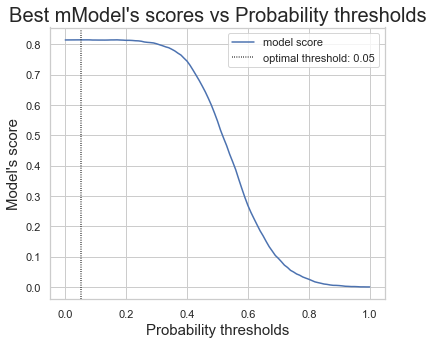

7:80: E501 line too long (109 > 79 characters)


In [125]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(np.linspace(0, 1, num=101), scores, label="model score")

max_score = max(scores)
opt_threshold = np.linspace(0, 1, num=101)[scores.index(max_score)]

plt.axvline(x=opt_threshold, color='k', dashes=(0.5, 1), label="optimal threshold: {}".format(opt_threshold))

plt.title("Best Model's scores vs Probability thresholds", fontsize=20)
plt.xlabel("Probability thresholds", fontsize=15)
plt.ylabel("Model's score", fontsize=15)
plt.legend()

print("Max score:", max_score)
print("Optimal threshold:", opt_threshold)

In [126]:
# same with cv model
scores_cv = []
for i in np.linspace(0, 1, num=101):
    score_cv = fbeta_threshold(y_model_proba, y_test, threshold=i)
    scores_cv.append(score_cv)

Max score: 0.8145032432485638
Optimal threshold: 0.0


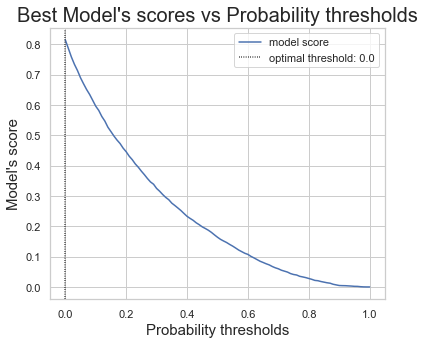

7:80: E501 line too long (109 > 79 characters)


In [127]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(np.linspace(0, 1, num=101), scores_cv, label="model score")

max_score = max(scores_cv)
opt_threshold = np.linspace(0, 1, num=101)[scores_cv.index(max_score)]

plt.axvline(x=opt_threshold, color='k', dashes=(0.5, 1), label="optimal threshold: {}".format(opt_threshold))

plt.title("Best Model's scores vs Probability thresholds", fontsize=20)
plt.xlabel("Probability thresholds", fontsize=15)
plt.ylabel("Model's score", fontsize=15)
plt.legend()

print("Max score:", max_score)
print("Optimal threshold:", opt_threshold)

In [135]:
# calculate pr-curve
precision_cv, recall_cv, thresholds_cv = precision_recall_curve(y_test, y_model_proba)

2:80: E501 line too long (86 > 79 characters)


In [136]:
fbeta7_score_cv = (1 + 49 * precision_cv * recall_cv) / (49 * precision_cv + recall_cv)

1:80: E501 line too long (87 > 79 characters)


In [137]:
# locate the index of the largest f score
ix = np.argmax(fbeta7_score_cv)

In [139]:
print('Opt cv Threshold=%f, F7-Score=%.3f' % (thresholds_cv[ix], fbeta7_score_cv[ix]))

Opt cv Threshold=0.984304, F7-Score=inf


1:80: E501 line too long (86 > 79 characters)


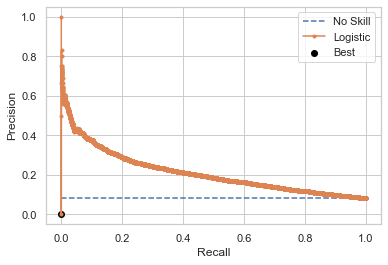

5:80: E501 line too long (85 > 79 characters)


In [140]:
# plot the roc curve for the model
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_cv, precision_cv, marker='.', label='Logistic')
plt.scatter(recall_cv[ix], precision_cv[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# Find best model & hyperparameters Targetting the best AUC Score

### Search space : focusing LGBM

In [387]:
models_spaces = {}

In [388]:
models_spaces['liggbm'] = {
    'model': LGBMClassifier,
    'n_estimators': hp.choice('liggbm_n_estimators', np.arange(10, 810, 50, dtype=int)),
    'class_weight': hp.choice('liggbm_class_weight', ['balanced']),
    'max_depth': hp.choice('liggbm_max_depth', np.arange(1, 30, dtype=int)),
    'num_leaves': hp.choice('liggbm_num_leaves', np.arange(4, 101, 4, dtype=int)),
    'boosting_type': hp.choice('liggbm_boosting_type', ['gbdt', 'dart', 'goss']),
    'learning_rate': hp.loguniform('liggbm_learning_rate', np.log(0.01), np.log(0.2))
}

3:80: E501 line too long (88 > 79 characters)
6:80: E501 line too long (82 > 79 characters)
7:80: E501 line too long (81 > 79 characters)
8:80: E501 line too long (85 > 79 characters)


In [389]:
# choice of a model into collection of models_spaces
space['models_spaces'] = hp.choice(
        'models_spaces',
        [models_spaces[key] for key in models_spaces]
    )

### Alternate Objective function & updated Trials functions

In [383]:
# Alternate objective function
def obj_fnc_auc(
    params,
    X_=X_train_re,
    y_=y_train
):

    # display the set of parameters currently evaluated
    print('current params:', params)
    # get all parameters, except the model
    parameters = params['models_spaces'].copy()
    del parameters['model']
    # create the classifier & its parameters
    clf = params['models_spaces']['model'](**parameters)
    # Perform n_folds cross validation
    start = timer()
    print('Cross-val predict in progress…')
    y_pred_proba = cross_val_predict(
        clf,
        X_,
        y_,
        method='predict_proba',
        cv=skf)[:, 1]
    # Compute score
    fpr, tpr, _ = roc_curve(y_, y_pred_proba)
    score = auc(fpr, tpr)
    # return loss and status
    loss = 1 - score
    run_time = timer() - start
    # displays results
    print("Loss of the model:", loss)
    # evaluation dict
    dict_eval = {
        'loss': loss,
        'score': score,
        'run_time': run_time,
        'status': STATUS_OK,
    }
    return dict_eval

In [384]:
def run_trials_auc():
    trials_step = 1  # nb add trials after loading (1: save after iteration)
    initial_evals = 1  # initial max_trials.
    try:  # try to load an already saved trials object, and increase the max
        hypopt_trials = pickle.load(open("hp_trials/trials_auc.hyperopt", "rb"))
        print("Found saved Trials! Loading...")
        max_evals = len(hypopt_trials.trials) + trials_step
        print("Rerunning from {} trials.".format(len(hypopt_trials.trials)))
    except:  # create a new trials object and start searching
        print("Unable to load previous trials...")
        hypopt_trials = Trials()
        max_evals = initial_evals
    # Optimisation accross the search space
    global best_params
    best_params = fmin(
        obj_fnc_auc,
        space=space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=hypopt_trials
    )
    # save the trials object
    with open("hp_trials/trials_auc.hyperopt", mode="wb") as f:
        pickle.dump(hypopt_trials, f)
    # get the best_params and save them
    best_params = space_eval(space, best_params)
    with open("hp_trials/best_params_auc.hyperopt", mode="wb") as f:
        pickle.dump(best_params, f)
    # print the main results
    print(
        # "\nAlgo:", best_params['models_spaces']['model'],
        "\nBest loss:", hypopt_trials.best_trial['result']['loss'],
        # "\nPreprocessing:", best_params['preprocessing_steps'],
        # "\nModel params:", best_params['models_spaces'],
        "\n----------------------",
    )

5:80: E501 line too long (80 > 79 characters)
9:5: E722 do not use bare 'except'


### Perform hyperopt

In [ ]:
keep_going = True


def key_capture_thread():
    global keep_going
    # blocks until pressing 'Esc'.
    keyboard.wait('esc')
    keep_going = False
    print('\nINTERRUPTING… Please wait until shut down.')


def trials_loop():
    th.Thread(target=key_capture_thread, args=(), name='key_capture_thread', daemon=True).start()
    while keep_going:
        print("\nRUNNING... Press 'ESC' key to interrupt.")
        # launch hyperopt
        run_trials_auc()
    print('\nINTERRUPTED!')


trials_loop()

### Get best model params

In [32]:
# Load the best_params
best_params = pickle.load(open("hp_trials/best_params_auc.hyperopt", "rb"))

# print current best_params
best_params

{'models_spaces': {'boosting_type': 'goss',
  'class_weight': None,
  'learning_rate': 0.10403727273445301,
  'max_depth': 2,
  'model': lightgbm.sklearn.LGBMClassifier,
  'n_estimators': 510,
  'num_leaves': 32}}

In [33]:
def define_model(params):
    # Get the model from parameters
    model = params['models_spaces'].pop('model')

    # Instanciate model with best parameters
    model_instance = model(**params['models_spaces'])

    # Return instanciated model
    return model_instance

In [35]:
best_model = define_model(best_params)

In [38]:
fpr_best, tpr_best, auc_score_best, f7_best = model_run(
    best_model,
    X_train_re,
    y_train,
    X_test_re,
    y_test)

LGBMClassifier(boosting_type='goss', learning_rate=0.10403727273445301,
               max_depth=2, n_estimators=510, num_leaves=32)
AUC score:  0.7602
AUC score -roc:  0.5084
Fbeta score (7):  0.0187


# Cross Validation optimization of best model 
In this case : LightGBM

In [39]:
def model_classify(model_in, dtrain_X, dtrain_Y, dtest_X, dtest_Y, n_folds=5):
    """Train and test a model using cross validation.
    """
    # Extract the ids
    # train_ids = dtrain_X.index
    test_ids = dtest_X.index
    print('Training Data Shape: ', dtrain_X.shape)
    print('Testing Data Shape: ', dtest_X.shape)
    # Extract feature names
    feature_names = list(dtrain_X.columns)
    # Convert to np arrays
    features = np.array(dtrain_X)
    test_features = np.array(dtest_X)
    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    # Empty array for test predictions
    predictions = np.zeros(test_features.shape[0])
    predictions_class = np.zeros(test_features.shape[0])
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    # print model
    print(model_in)
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        # Training data for the fold
        train_features, train_labels = features[train_indices], dtrain_Y.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], dtrain_Y.iloc[valid_indices]
        model = model_in
        # Train the model
        model.fit(train_features,
                  train_labels,
                  eval_metric='auc',
                  eval_set=[(valid_features, valid_labels),
                            (train_features, train_labels)],
                  eval_names=['valid', 'train'],
                  early_stopping_rounds=100, verbose=200)
        # Record the best iteration
        best_iteration = model.best_iteration_
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        # Make predictions
        predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:, 1] / k_fold.n_splits
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()
    # Make the predictions dataframe
    test_predictions = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': predictions})
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    # Overall validation score
    valid_auc = roc_auc_score(dtrain_Y, out_of_fold)
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    # Dataframe of validation scores
    fold_scores = pd.DataFrame({'fold': fold_names,
                                'train': train_scores,
                                'valid': valid_scores}) 
    predictions_proba = model.predict(test_features, num_iteration=best_iteration)
    predictions_class = model.predict_proba(test_features, num_iteration=best_iteration)
    with open("cv_opt/predictions_proba", mode="wb") as f:
        pickle.dump(predictions_proba, f)
    with open("cv_opt/predictions_class", mode="wb") as f:
        pickle.dump(predictions_proba, f)
    fpr, tpr, thresholds   = roc_curve(dtest_Y, predictions)
    auc_roc = auc(fpr, tpr)
    f1_sc = f1_score(dtest_Y, predictions_class)
    f7 = fbeta_score(dtest_Y, predictions_class, beta=7)
    accuracy = accuracy_score(dtest_Y, predictions_class)
    classify_metrics = classification_report(dtest_Y, predictions_class)
    # save the model to disk
    filename = 'cv_opt/finalized_model.sav'
    pickle.dump(model, open(filename, 'wb'))
    print(model)
    return feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, f7, auc_roc, fpr, tpr

31:80: E501 line too long (92 > 79 characters)
33:80: E501 line too long (92 > 79 characters)
46:80: E501 line too long (81 > 79 characters)
48:80: E501 line too long (111 > 79 characters)
50:80: E501 line too long (108 > 79 characters)
61:5: F841 local variable 'test_predictions' is assigned to but never used
61:80: E501 line too long (84 > 79 characters)
63:80: E501 line too long (107 > 79 characters)
75:56: W291 trailing whitespace
76:80: E501 line too long (82 > 79 characters)
77:80: E501 line too long (88 > 79 characters)
82:25: E221 multiple spaces before operator
92:80: E501 line too long (101 > 79 characters)


In [375]:
best_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.04711849642183811,
 'max_depth': 28,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 760,
 'n_jobs': -1,
 'num_leaves': 12,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, f7, auc_score, fpr, tpr  = model_classify(
    best_model,
    X_train_re,
    y_train,
    X_test_re,
    y_test)

print('Baseline metrics')
print(fold_scores)

Accuracy score :  0.7294234333842802
F1 score :  0.28156974485170316
Fbeta-7 score :  0.6235587017129219
AUC :  0.7649332297446009
classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.83     56537
         1.0       0.18      0.66      0.28      4965

    accuracy                           0.73     61502
   macro avg       0.57      0.70      0.56     61502
weighted avg       0.90      0.73      0.79     61502



Text(0, 0.5, 'True Positive Rate')

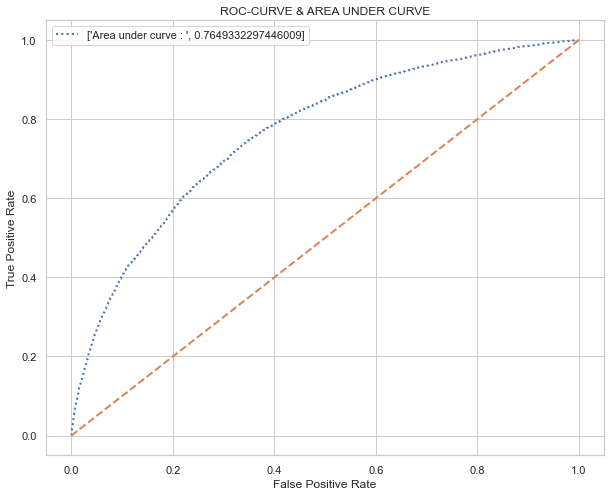

1:6: E211 whitespace before '('
2:6: E211 whitespace before '('
3:6: E211 whitespace before '('
4:6: E211 whitespace before '('
5:6: E211 whitespace before '('
6:1: W293 blank line contains whitespace
7:29: E231 missing whitespace after ','
8:3: E221 multiple spaces before operator
9:80: E501 line too long (92 > 79 characters)


In [59]:
print ("Accuracy score : ", accuracy)
print ("F1 score : ", f1_sc)
print ("Fbeta-7 score : ", f7)
print ("AUC : ", auc_score)
print ("classification report :\n", classify_metrics)
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linewidth=2, linestyle="dotted")
ax.plot(fpr, tpr, label=["Area under curve : ", auc_score], linewidth=2, color='red')
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [51]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

4:66: W291 trailing whitespace
6:1: W293 blank line contains whitespace
8:48: E251 unexpected spaces around keyword / parameter equals
8:50: E251 unexpected spaces around keyword / parameter equals
9:1: W293 blank line contains whitespace
14:23: E251 unexpected spaces around keyword / parameter equals
14:25: E251 unexpected spaces around keyword / parameter equals
16:1: W293 blank line contains whitespace
18:49: W291 trailing whitespace
19:50: W291 trailing whitespace
20:18: E251 unexpected spaces around keyword / parameter equals
20:20: E251 unexpected spaces around keyword / parameter equals
20:40: E251 unexpected spaces around keyword / parameter equals
20:42: E251 unexpected spaces around keyword / parameter equals
21:1: W293 blank line contains whitespace
25:1: W293 blank line contains whitespace
27:40: E702 multiple statements on one line (semicolon)
29:1: W293 blank line contains whitespace


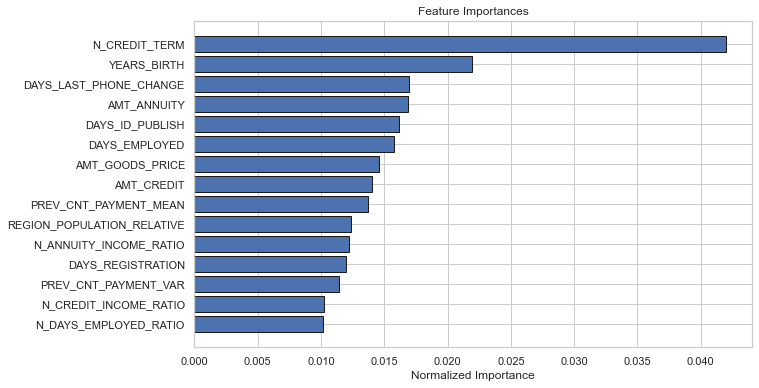

In [61]:
# Show the feature importances for the new features
feature_importances_sorted = plot_feature_importances(feature_importances)

# Overview of results

In [92]:
# Collect results
classifier_names = [
    'Gaussian Naive Bayes',
    'Logistic Regression',
    'LogReg_Best',
    'Random Forest',
    'LightGBM',
    'LightGBM_CV']
auc_scores = [
    auc_score_naive,
    auc_score_logreg,
    auc_score_best,
    auc_score_rndfor,
    auc_score_liggbm,
    auc_score]
f7_scores = [
    f7_naive,
    f7_logreg,
    f7_best,
    f7_rndfor,
    f7_liggbm,
    f7]

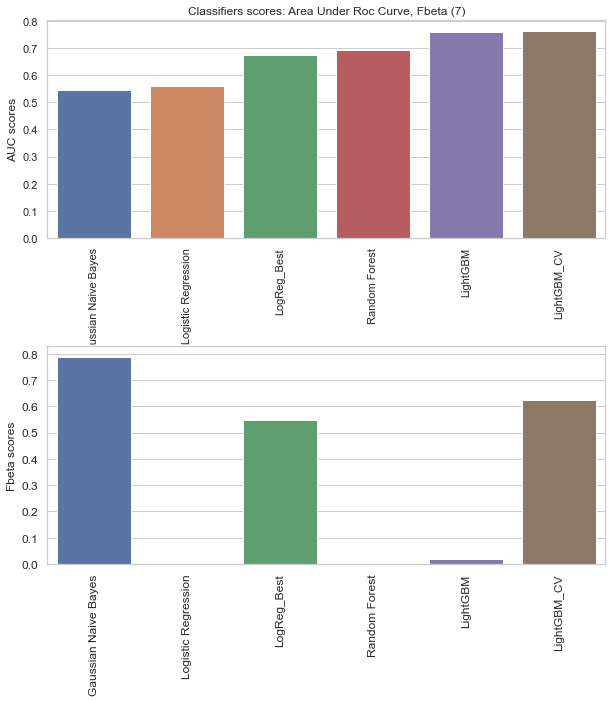

In [93]:
# display results
sns.set_color_codes("colorblind")
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Classifiers scores: Area Under Roc Curve, Fbeta (7)')
s1 = sns.barplot(x=classifier_names, y=auc_scores)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.ylabel('AUC scores', fontsize=12)
plt.subplot(212)
s2 = sns.barplot(x=classifier_names, y=f7_scores)
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
plt.ylabel('Fbeta scores', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace=0.5)
plt.show()

Text(0, 0.5, 'True Positive Rate')

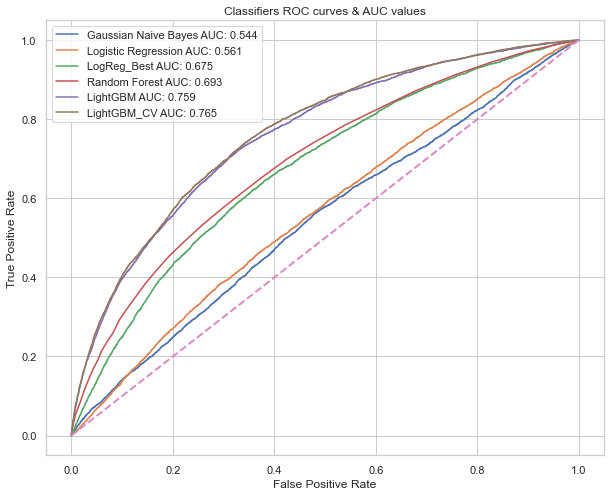

In [94]:
# display roc curves
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(
    fpr_naive,
    tpr_naive,
    label=str(classifier_names[0])
    + ' AUC: '
    + str(round(auc_score_naive, 3)))
ax.plot(
    fpr_logreg,
    tpr_logreg,
    label=str(classifier_names[1])
    + ' AUC: '
    + str(round(auc_score_logreg, 3)))
ax.plot(
    fpr_best,
    tpr_best,
    label=str(classifier_names[2])
    + ' AUC: '
    + str(round(auc_score_best, 3)))
ax.plot(
    fpr_rndfor,
    tpr_rndfor,
    label=str(classifier_names[3])
    + ' AUC: '
    + str(round(auc_score_rndfor, 3)))
ax.plot(
    fpr_liggbm,
    tpr_liggbm,
    label=str(classifier_names[4])
    + ' AUC: '
    + str(round(auc_score_liggbm, 3)))
ax.plot(
    fpr,
    tpr,
    label=str(classifier_names[5])
    + ' AUC: '
    + str(round(auc_score, 3)))

ax.plot([0, 1], [0, 1], linewidth=2, linestyle='--')
plt.legend(loc="best")
plt.title("Classifiers ROC curves & AUC values")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Train & predict

In [43]:
best_model

LGBMClassifier(boosting_type='goss', learning_rate=0.10403727273445301,
               max_depth=2, n_estimators=510, num_leaves=32)

In [44]:
best_model.fit(X_train_re, y_train)

LGBMClassifier(boosting_type='goss', learning_rate=0.10403727273445301,
               max_depth=2, n_estimators=510, num_leaves=32)

In [45]:
y_test = best_model.predict(X_test_re)
y_proba = best_model.predict_proba(X_test_re)[:, 1]

In [48]:
feature_importance_values = best_model.feature_importances_

In [49]:
feature_names = list(X_train.columns)

In [50]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

1:80: E501 line too long (103 > 79 characters)


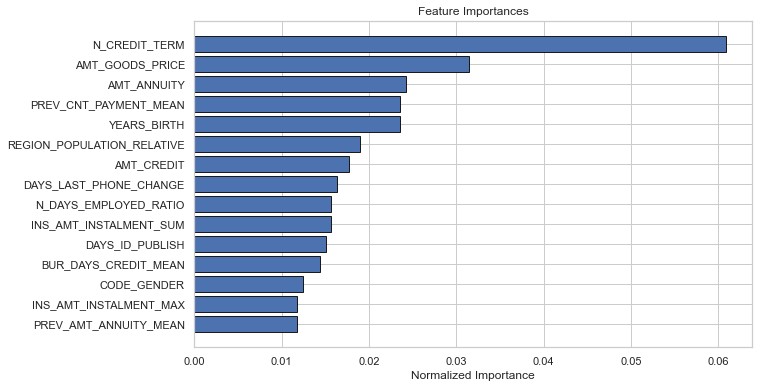

In [52]:
# Show the feature importances for the new features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [53]:
final = X_test.copy()
final['RISK_FLAG'] = y_test

In [54]:
final['RISK_PROBA'] = y_proba

In [55]:
final.head(1)

,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,N_CNT_PREV_REJECTED_SCOFR,N_FLAG_REJECTED,N_PREV_LAST_REJECTION,N_ADJ_REJECT_INDEX,N_PREV_LAST_APPLICATION,N_REJECT_RATE,N_CNT_BUR_LOANS,N_BUR_LAST_APPLICATION,YEARS_BIRTH,N_DAYS_EMPLOYED_RATIO,N_CREDIT_INCOME_RATIO,N_ANNUITY_INCOME_RATIO,N_CREDIT_TERM,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Pensioner,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MAX,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_SUM,BUR_AMT_CREDIT_SUM_MAX,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_SUM,BUR_AMT_CREDIT_SUM_DEBT_MAX,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_DEBT_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR,BUR_CREDIT_ACTIVE_Active_MEAN,BUR_CREDIT_ACTIVE_Closed_MEAN,BUR_CREDIT_TYPE_Cash loans_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MIN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MAX,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_MEAN,ACTIVE_N_BUR_AMT_CREDIT_DEBT_RATE_SUM,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_VAR,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_N_APP_CREDIT_RATIO_MIN,PREV_N_APP_CREDIT_RATIO_MAX,PREV_N_APP_CREDIT_RATIO_MEAN,PREV_N_ADJ_CREDIT_RATIO_MIN,PREV_N_ADJ_CREDIT_RATIO_MAX,PREV_N_ADJ_CREDIT_RATIO_MEAN,PREV_N_ADJ_INTEREST_EVAL_MIN,PREV_N_ADJ_INTEREST_EVAL_MAX,PREV_N_ADJ_INTEREST_EVAL_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MIN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_VAR,PREV_NC_LOAN_TERM_SUM,PREV_NC_LOAN_TERM_VAR,PREV_NC_LOAN_AGE_MAX,PREV_NC_LOAN_AGE_MEAN,PREV_NC_LOAN_AGE_SUM,PREV_NC_LOAN_AGE_VAR,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_CODE_REJECT_REASON_REJECTED_HC_MEAN,PREV_CODE_REJECT_REASON_REJECTED_SCOFR_MEAN,PREV_CODE_REJECT_REASON_REJECTED_XAP_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_N_CONTRACT_STATUS_APPROVED_MEAN,PREV_N_CONTRACT_STATUS_REJECTED_HC_MEAN,PREV_N_CONTRACT_STATUS_REJECTED_SCOFR_MEAN,A

In [56]:
# save the model to disk
filename = 'cv_opt/finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [57]:
# save the results
filename = 'cv_opt/final'
pickle.dump(final, open(filename, 'wb'))

### Digging deeper into classification matrix

In [ ]:
log_reg.fit(X_train, y_train)
pred, y_pred = threshold_pred(log_reg_weight, X_test, threshold=0.5)

In [ ]:
plt.xlabel('Probabilities')
plt.ylabel('Count')
plt.hist(pred[:, 0], bins=100)
plt.hist(pred[:, 1], bins=100)
plt.show()

first, we need to avoid __False Negative__ : approval of any clients with actual defaults is our worts case, predicting target 0 while actual value is 1.
then, we also wish to avoid __False Positive__ : rejecting too many clients who actually would not fail, predicting target 1 while actual value is 0.

In [ ]:
# get any case of the confusion matrix
# ravel() is equivalent to flatten for arrays
(tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
(ttn, tfp, tfn, ttp) = confusion_matrix(y_test, y_pred).ravel() / len(y_test)

In [ ]:
(tn, fp, fn, tp)

In [ ]:
(ttn, tfp, tfn, ttp) 

In [ ]:
pred_nom = log_reg.predict(X_test)
(ntn, nfp, nfn, ntp) = confusion_matrix(y_test, pred_nom).ravel()
(ntn, nfp, nfn, ntp)

In [ ]:
# get the precision, recall
precision, recall, f_thresholds = precision_recall_curve(y_test, pred[:, 1])

In [ ]:
print(np.count_nonzero(y_test))
print(len(y_test))

In [ ]:
# optimal threshold
list_tn = []
list_fp = []
list_fn = []
list_tp = []
list_prec = []
list_rec = []
list_fscore = []
list_gain = []
list_custom = []
threshold_values = []

tp_coef = 0
tn_coef = 1
fn_coef = -7
fp_coef = -1

worst_case = fp_coef * np.count_nonzero(y_test) + tn_coef * (len(y_test) - np.count_nonzero(y_test))
best_case = tn_coef * (len(y_test) - np.count_nonzero(y_test))


for i in np.arange(0, 1, 0.01):
    _, temp_y_pred = threshold_pred(log_reg_weight, X_test, threshold=i)
    tn, fp, fn, tp = confusion_matrix(y_test, temp_y_pred).ravel()
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    fscore = 2 * prec * rec / (prec + rec)
    gain = tp * tp_coef + tn * tn_coef + fn * fn_coef + fp * fp_coef
    custom = (gain - worst_case) / (best_case - worst_case)
    threshold_values.append(i)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)
    list_tp.append(tp)
    list_prec.append(prec)
    list_rec.append(rec)
    list_fscore.append(fscore)
    list_gain.append(gain)
    list_custom.append(custom)

In [ ]:
confusion_matrix_df = pd.DataFrame({'tn': list_tn,
                                    'fp': list_fp,
                                    'fn': list_fn,
                                    'tp': list_tp},
                                   index=threshold_values)

In [ ]:
confusion_matrix_df.sample(10)

In [ ]:
scores_df = pd.DataFrame({'precision': list_prec,
                          'recall': list_rec,
                          'f1score': list_fscore,
                          'gain': list_gain,
                          'custom': list_custom},
                         index=threshold_values)

In [ ]:
scores_df.sample(10)

In [ ]:
scores_df['gain'].plot()

In [ ]:
rates = confusion_matrix_df.divide(confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn', 'tp', 'tn']]

In [ ]:
tot_rate = confusion_matrix_df.divide(confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']].sum(axis=1)

In [ ]:
# precision = precision_recall_df['precision']

In [ ]:
fig, ax = plt.subplots()
pal = ['#fbb4ae', '#e41a1c', '#cccccc', '#b3e2cd']
rates.plot(kind='area', stacked=True, ax=ax, color=pal)
tot_rate.plot(ax=ax, color='black', label='%tot_rate')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

We have to find the right balance (cost) between both case to catch an optimal threshold : fn is n times worst than fp. as it primarily depends on the famous {X, Y} parameters, leading to a damage we have no clue to compute, we don't know real value of n. <br/>
n would surely be different for revolving or high amount credits. <br/>
let's start with 7, just to see the resulting shape of a damage value.

In [ ]:
damage_df = pd.DataFrame({'fp damages : unit': confusion_matrix_df['fp'],
                          'fn damages : 7x unit': 7 * confusion_matrix_df['fn']})

In [ ]:
damages = (damage_df/damage_df.sum(axis=1).max())

In [ ]:
tot_damage = (damage_df.sum(axis=1)/damage_df.sum(axis=1).max())

In [ ]:
np.argmin(tot_damage)

In [ ]:
scores_df.head(3)

In [ ]:
fig, ax = plt.subplots()
damages.plot(kind='area', stacked=True, ax=ax, color=pal)
tot_damage.plot(ax=ax, color="black", label="%tot_rate")
# scores_df['precision'].plot(ax=ax, color='green', label='%precision')
# scores_df['recall'].plot(ax=ax, color='red', label='%recall')
scores_df['f1score'].plot(ax=ax, color='green', label='%f1score')
plt.axvline(x=0.57, color='k', linestyle='--')
# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 1)
ax.legend()
plt.show()

In [ ]:
# print(precision_recall_df['f1score'].idxmax())
# print(precision_recall_df.loc[precision_recall_df['f1score'].idxmax(), 'f1score'])

In [ ]:
# refine optimal threshold

list_tn = []
list_fp = []
list_fn = []
list_tp = []
threshold_values =[]

for i in np.arange(0,0.2,0.01) :
    temp_y_pred = threshold_pred(random_forest, X_test, threshold=i)
    tn, fp, fn, tp = confusion_matrix(y_test, temp_y_pred).ravel()
    print(tn, fp, fn, tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)
    list_tp.append(tp)
    threshold_values.append(i)

In [ ]:
adj_confusion_matrix_df = pd.DataFrame({'tn' : list_tn,
                                        'fp' : list_fp,
                                        'fn' : list_fn,
                                        'tp' : list_tp},
                                        index=threshold_values) 

In [ ]:
adj_rates = adj_confusion_matrix_df.divide(adj_confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']]
adj_tot_rate = adj_confusion_matrix_df.divide(adj_confusion_matrix_df.sum(axis=1), axis=0)[['fp', 'fn']].sum(axis=1)

In [ ]:
fig, ax = plt.subplots()
adj_rates.plot(kind='area', stacked=True, ax=ax)
adj_tot_rate.plot(ax=ax, color="black", label="%tot_rate")
ax.set_xlim(0,0.8)
ax.set_ylim(0,1)
ax.legend()
plt.show()

In [ ]:
adj_damage_df = pd.DataFrame({'fp damages : unit' : adj_confusion_matrix_df['fp'],
                              'fn damages : 7x unit' : 7 * adj_confusion_matrix_df['fn']})

adj_damages = (adj_damage_df/adj_damage_df.sum(axis=1).max())

adj_tot_damage = (adj_damage_df.sum(axis=1)/adj_damage_df.sum(axis=1).max())

In [ ]:
fig, ax = plt.subplots()
adj_damages.plot(kind='area', stacked=True, ax=ax)
adj_tot_damage.plot(ax=ax, color="black", label="%tot_rate")
ax.set_xlim(0,0.8)
ax.set_ylim(0,1)
ax.legend()
plt.show()

In [ ]:
# optimal threshold
adj_damage_df.sum(axis=1).idxmin()